# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from IPython import get_ipython
from statsmodels.distributions.empirical_distribution import ECDF
from IPython.core.pylabtools import figsize

In [2]:
figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
qt = dataframe.quantile((0.25, 0.5, 0.75))
tuple((qt['normal'] - qt['binomial']).round(3))


(0.31, -0.01, -0.316)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    qt = dataframe.quantile((0.25, 0.5, 0.75))
    
    return tuple((qt['normal'] - qt['binomial']).round(3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    ecdf = ECDF(dataframe['normal'])
    mean = dataframe['normal'].mean()
    std = dataframe['normal'].std()
    
    return float(ecdf(mean + std) - ecdf(mean - std))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [7]:
def q2n(n):
    ecdf = ECDF(dataframe['normal'])
    mean = dataframe['normal'].mean()
    std = dataframe['normal'].std()
    
    return round(float(ecdf(mean + n*std) - ecdf(mean - n*std)), 4)


for i in range(0, 3):
    print(f'No intervalo de média +/- {i+ 1} x desvio padrão, espera-se que estejam {q2n(i + 1)*100}% dos dados')

No intervalo de média +/- 1 x desvio padrão, espera-se que estejam 68.38% dos dados
No intervalo de média +/- 2 x desvio padrão, espera-se que estejam 95.38% dos dados
No intervalo de média +/- 3 x desvio padrão, espera-se que estejam 99.72999999999999% dos dados


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [8]:
def q3():
    means = dataframe.mean()
    variances = dataframe.var()

    return (
        round(means['binomial'] - means['normal'], 3), 
        round(variances['binomial'] - variances['normal'], 3)
    )

In [9]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valores dessa magnitude?
 
- Reposta: Sim, pois o valor de amostra binomial é pequeno.

* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

- Reposta: Aumentar o número de ocorrências de $n$ no modelo binomial faz com que a distribuição se aproxime cada vez mais do modelo normal, portanto, diminuindo as diferenças dos valores de média e variância entre os modelos e vice versa.

## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [11]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [12]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [13]:
    non_pulsar = stars[stars['target'] == 0]['mean_profile']
    std_non_pulsar = (non_pulsar - non_pulsar.mean()) / non_pulsar.std()
    # print(std_non_pulsar.mean(), std_non_pulsar.var())

In [14]:
def q4():
    non_pulsar = stars[stars['target'] == 0]['mean_profile']
    std_non_pulsar = (non_pulsar - non_pulsar.mean()) / non_pulsar.std()
    ecdf = ECDF(std_non_pulsar)
    q80 = sct.norm.ppf(0.8, loc = 0, scale = 1)
    q90 = sct.norm.ppf(0.9, loc = 0, scale = 1)
    q95 = sct.norm.ppf(0.95, loc = 0, scale = 1)

    return (
        ecdf(q80).round(3), 
        ecdf(q90).round(3), 
        ecdf(q95).round(3)
    )


q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

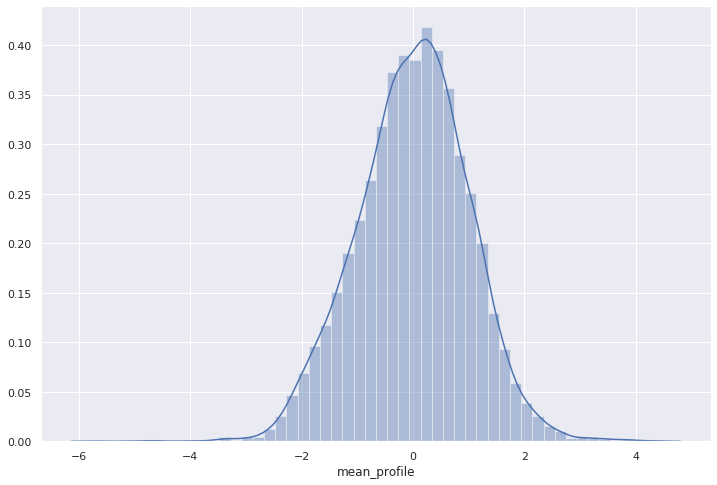

In [15]:
sns.distplot(std_non_pulsar);

- Resposta: A distribuição falsa é bastante próxima da distribuição normal, portanto os valores fazem sentido

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [16]:
def q5():
    non_pulsar = stars[stars['target'] == 0]['mean_profile']
    std_non_pulsar = (non_pulsar - non_pulsar.mean()) / non_pulsar.std()
    non_pulsar_qt = std_non_pulsar.quantile((0.25, 0.5, 0.75))
    normal_qt = sct.norm.ppf((0.25, 0.5, 0.75), loc = 0, scale = 1)
    non_pulsar_qt = np.array(non_pulsar_qt.tolist())

    return tuple(np.around(non_pulsar_qt - normal_qt, decimals = 3))


q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

- Resposta: Demonstra que a distribuição Falsa é muito próxima da distribuição Normal
<br><br>
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.